## Inspecting LPR events

In [56]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

## Acess data

In [57]:
path     = "/scratch/next/data/NEXT100/pressure_topology/"
sample   = "0nubb"
pressure = "2bar"
filename = "voxel_dataset_" + pressure + "_" + sample + ".h5"
print('Opening :', filename)
data     = pd.read_hdf(path + filename, "voxels") 

Opening : voxel_dataset_2bar_0nubb.h5


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14623148 entries, 0 to 66507
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   file_id   int64  
 1   event     int64  
 2   x         int16  
 3   y         int16  
 4   z         int16  
 5   E         float64
 6   binclass  int8   
 7   segclass  int64  
 8   track_id  int64  
 9   nhits     int16  
 10  ext       int64  
dtypes: float64(1), int16(4), int64(5), int8(1)
memory usage: 906.5 MB


## Code

In [59]:
get_event = lambda ifile, ievent : data[(data.file_id == ifile) & (data.event == ievent)]

In [60]:
def xylabel(xlabel = "x (mm)", ylabel = "y (mm)"):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [61]:
def lstats(var):
    mean, std = np.mean(var), np.std(var)
    comment = "mean = {:.3f} \n std = {:.3f}".format(mean, std)
    return comment

## Inspect events

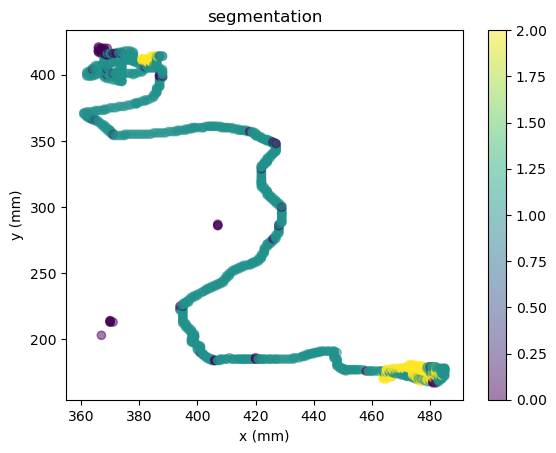

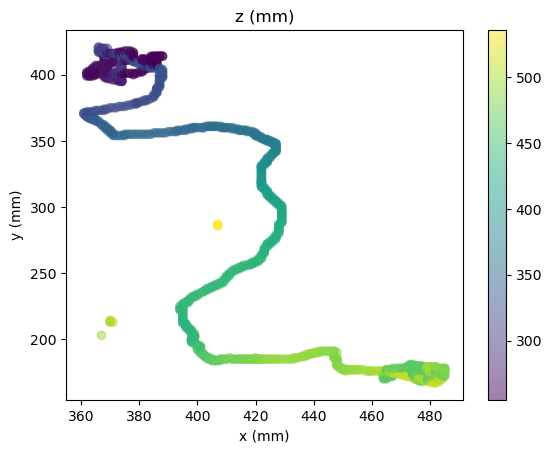

<Figure size 640x480 with 0 Axes>

In [62]:
evt = get_event(1, 20)
plt.scatter(evt.x, evt.y, c = evt.segclass, alpha = 0.5); 
xylabel(); plt.title("segmentation"); plt.colorbar(); plt.show()
plt.scatter(evt.x, evt.y, c = evt.z, alpha = 0.5); xylabel()
xylabel(); plt.title("z (mm)"); plt.colorbar(); plt.show()
plt.tight_layout();


In [63]:
edat = data.groupby(["file_id", "event"])
edatsum = edat.sum()
edatmin = edat.min()
edatmax = edat.max()
edatave = edat.mean()
edatstd = edat.std()
edatcounts = edat.count()

In [64]:
print("Number of events ", len(edatcounts))

Number of events  13549


## Event distributions

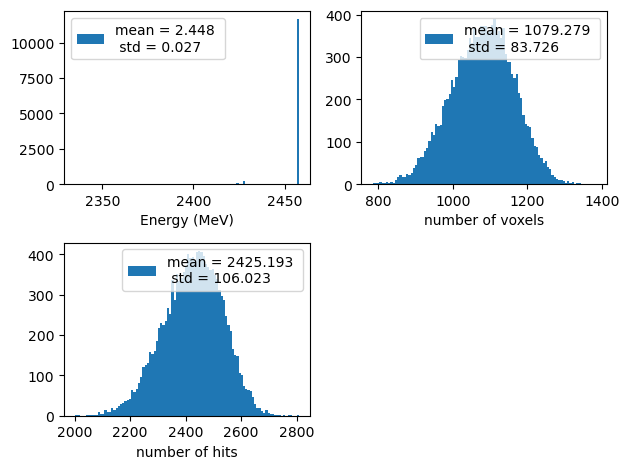

In [65]:
plt.subplot(2, 2, 1); plt.hist(1e3 * edatsum.E, 100, label = lstats(edatsum.E)); plt.xlabel("Energy (MeV)"); plt.legend()
plt.subplot(2, 2, 2); plt.hist(edatcounts.E, 100, label = lstats(edatcounts.E)); plt.xlabel("number of voxels"); plt.legend()
plt.subplot(2, 2, 3); plt.hist(edatsum.nhits, 100, label = lstats(edatsum.nhits)); plt.xlabel("number of hits"); plt.legend()
plt.tight_layout()


## Main Track distributions

In [66]:
data0 = data[data.track_id == 0]
edat0 = data0.groupby(by = ["file_id", "event"])
edat0sum = edat0.sum()
edat0min = edat0.min()
edat0max = edat0.max()
edat0ave = edat0.mean()
edat0std = edat0.std()
edat0counts = edat0.count()


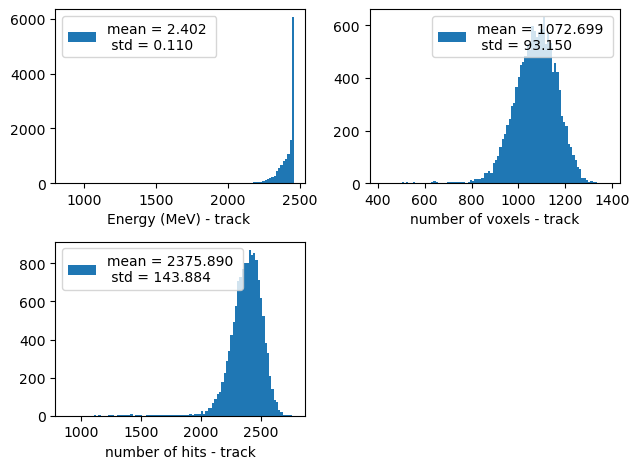

In [67]:
plt.subplot(2, 2, 1); plt.hist(1e3 * edat0sum.E, 100, label = lstats(edat0sum.E)); plt.xlabel("Energy (MeV) - track "); plt.legend()
plt.subplot(2, 2, 2); plt.hist(edat0counts.E, 100, label = lstats(edat0counts.E)); plt.xlabel("number of voxels - track"); plt.legend()
plt.subplot(2, 2, 3); plt.hist(edat0sum.nhits, 100, label = lstats(edat0sum.nhits)); plt.xlabel("number of hits - track"); plt.legend()
plt.tight_layout()

In [68]:
dx     = edat0max.x - edat0min.x
dy     = edat0max.y - edat0min.y
dz     = edat0max.z - edat0min.z
dnhits = edat0max.nhits - edat0min.nhits

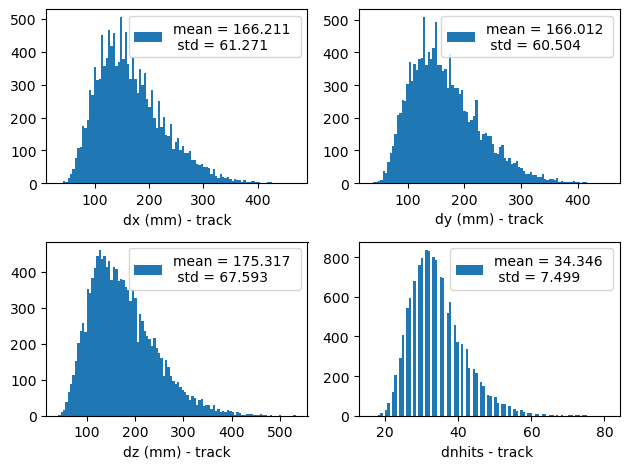

In [69]:
plt.subplot(2, 2, 1); plt.hist(dx, 100, label = lstats(dx)); plt.xlabel("dx (mm) - track"); plt.legend()
plt.subplot(2, 2, 2); plt.hist(dy, 100, label = lstats(dy)); plt.xlabel("dy (mm) - track"); plt.legend()
plt.subplot(2, 2, 3); plt.hist(dz, 100, label = lstats(dz)); plt.xlabel("dz (mm) - track"); plt.legend()
plt.subplot(2, 2, 4); plt.hist(dnhits, 100, label = lstats(dnhits)); plt.xlabel("dnhits - track "); plt.legend()
plt.tight_layout()


## Information per voxel

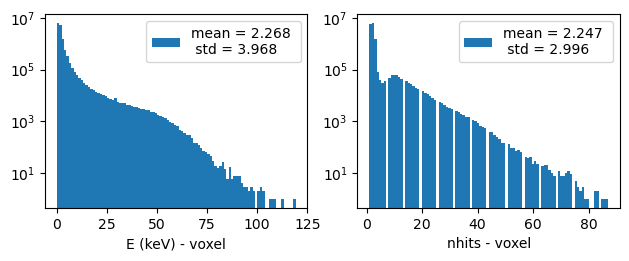

In [70]:
plt.subplot(2, 2, 1); plt.hist(1e3*data.E, 100, label = lstats(1e3*data.E)); plt.xlabel("E (keV) - voxel"); plt.legend(); plt.yscale('log')
plt.subplot(2, 2, 2); plt.hist(data.nhits, 100, label = lstats(data.nhits)); plt.xlabel("nhits - voxel"); plt.legend(); plt.yscale('log')
plt.tight_layout()

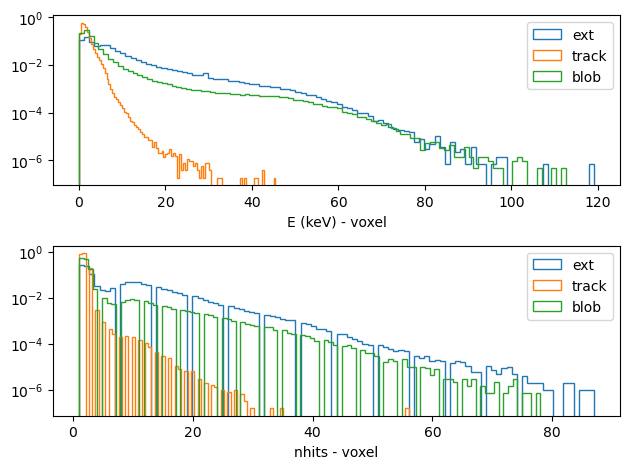

In [71]:
segname = ['ext', 'track', 'blob']
plt.subplot(2, 1, 1);
for isegment in range(3):
    iee = 1e3*data.E[data.segclass == isegment]
    plt.hist(iee, 100, label =segname[isegment], density = True, alpha = 1., histtype='step'); 
plt.xlabel("E (keV) - voxel"); plt.legend(); plt.yscale('log');
    
plt.subplot(2, 1, 2);
for isegment in range(3):
    nhits = data.nhits[data.segclass == isegment]
    plt.hist(nhits, 100, label = segname[isegment], density = True, alpha = 1., histtype='step'); 
plt.xlabel("nhits - voxel"); plt.legend(); plt.yscale('log');
plt.tight_layout()


In [72]:
data

,file_id,event,x,y,z,E,binclass,segclass,track_id,nhits,ext
0,1,0,248,431,433,0.022881,1,0,1,21,0
1,1,0,249,431,433,0.006859,1,0,1,3,0
2,1,0,249,432,433,0.051013,1,0,1,26,0
3,1,0,250,432,433,0.002971,1,0,1,2,0
4,1,0,290,160,170,0.001514,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
66503,250,60,430,272,130,0.001010,1,1,0,2,0
66504,250,60,430,273,130,0.002214,1,1,0,2,0
66505,250,60,430,274,130,0.001318,1,1,0,3,0
66506,250,60,430,275,130,0.002050,1,1,0,2,0


In [73]:
from datetime import datetime

current_time = datetime.now()
formatted_time = current_time.strftime('%A %d %B %Y')
print(formatted_time)
formatted_time = current_time.strftime('%H:%M:%S')
print(formatted_time)


Thursday 11 April 2024
14:58:38
